***On s'intéresse au climat des différents pays d'Europe. Pour cela, on a recueilli les temprératures mensuelles (en degrés Celsius) pour certaines grandes villes européennes, ainsi que leurs températures moyennes annueles et l'amplitude thermique (différence entre la moyenne mensuelle maximum et la moyenne mensuell minimum d'une ville). On donne également la longitude et la latitude de chaque ville et son appartenance à une région de l'Europe (Nord, Sud, Est, Ouest) dont un extrait est dans le lien suivant.***

**On souhaite appéhender la variabilité des températures mensuelles d'un pays à l'autre de façon multidimensionnelle, i.e. en prenant en compte simultanément les 12 mois de l'année. Un pays sera représenté par le climat de sa capitale, les données des autres pays ne sont pas prises en compte pour éviter d'accorder plus de poids aux pays pour lesquelles plusieurs villes sont renseignés. Ainsi, les capitales seront considérées comme des individus actifs tandis que les autres villes seront considérées comme des individus supplémentaires (i.e. qui n'interviendrontpas dans la construction des axes). Du point de vue multidimensionnel, deux villes sont d'autant plus proches qu'elles présentes le même ensemble de températures mensuelles. Une façon synthétique d'aborder ces données est de mettre en évidence les principaux facteurs de variabilité des capitales. On pourra ainsi répondre à des questions du type : quelles sont les plus grandes disparités entre pays ? Ces facteurs pourront servir de base à la construction d'une typologie sur les pays.**

Les données sont téléchargeables via le lien suivant : https://drive.google.com/uc?export=download&id=19DHk_qPCbomlJN8pt_zhPot2d9SO0QAy

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [43]:
file_path = "temperat.csv"
df = pd.read_csv(file_path, delimiter=";")

# Afficher les premières lignes du dataset
df.head()

,Unnamed: 0,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est


In [44]:
data_matrix = df.to_numpy()

# Affichage des dimensions de la matrice
data_matrix.shape

(35, 18)

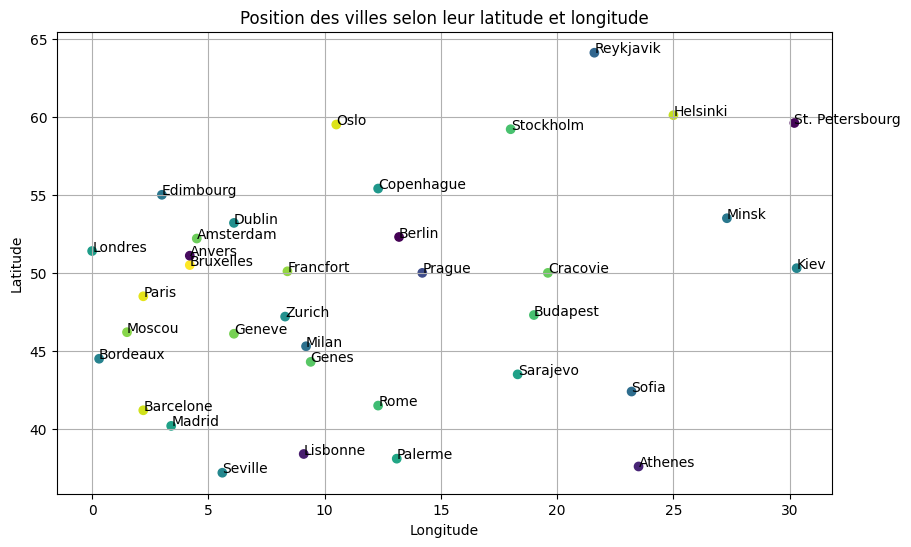

In [45]:
# Extraire les noms des villes, latitudes et longitudes
villes = df.iloc[:, 0]  
latitudes = df["Latitude"]
longitudes = df["Longitude"]

# Affichage des villes sur une carte
colors = np.random.rand(len(villes))
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=colors)
for i, ville in enumerate(villes):
    plt.text(longitudes[i], latitudes[i], ville)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Position des villes selon leur latitude et longitude")
plt.grid()
plt.show()

In [46]:
# Sélectionner uniquement les températures mensuelles (Janvier à Décembre)
df_temp = df.iloc[:, 1:13] 

# Vérification
df_temp.head()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre
0,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
1,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
2,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
3,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
4,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7


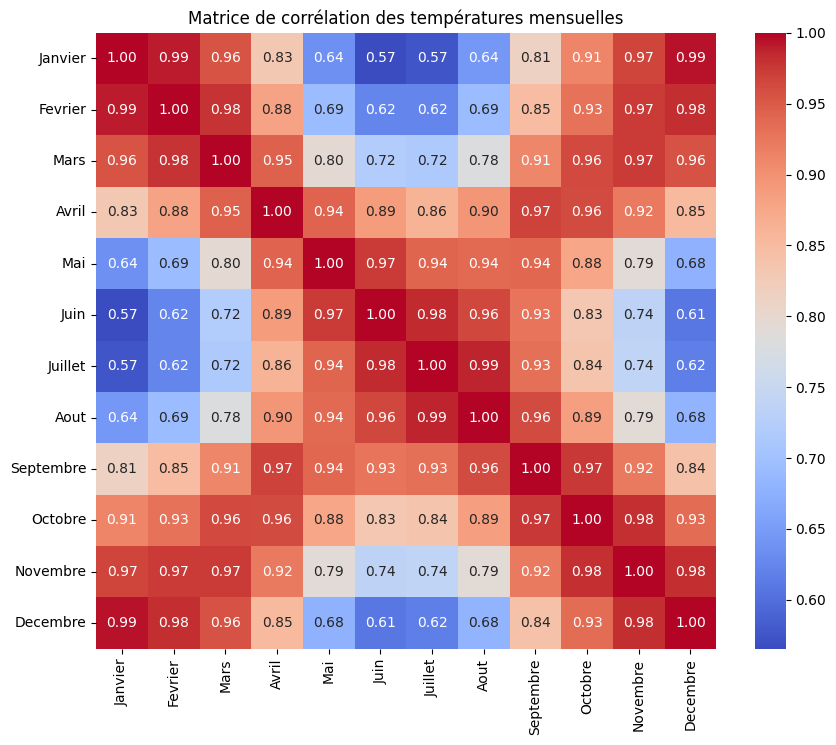

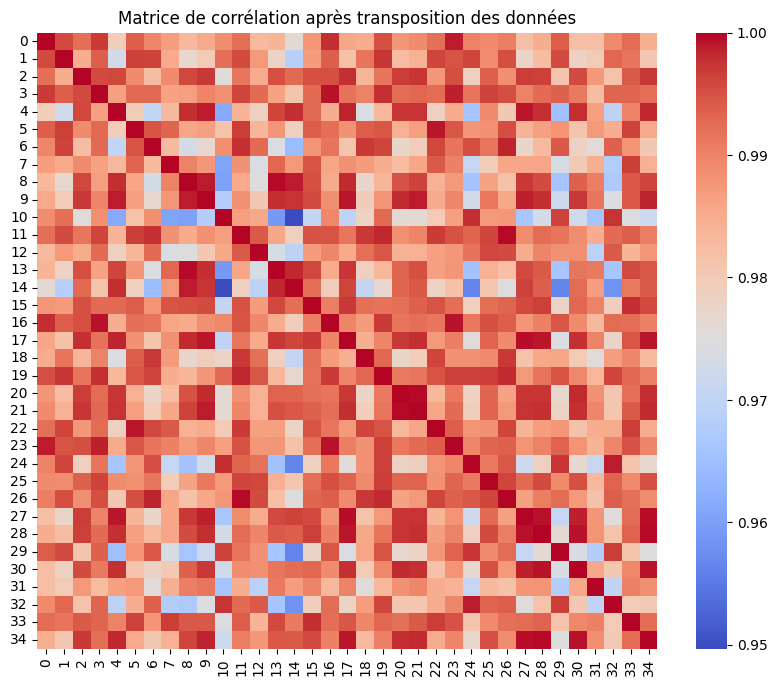

In [47]:
# Calcul de la matrice de corrélation
corr_matrix = df_temp.corr()

# Affichage 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des températures mensuelles")
plt.show()

# Transposition de la matrice et recalcul de la corrélation
df_temp_T = df_temp.T
corr_matrix_T = df_temp_T.corr()

# Affichage
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_T, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation après transposition des données")
plt.show()

*Matrice de corrélation* : Les températures des mois proches sont fortement corrélées entre elles, ce qui est cohérent car les températures suivent des cycles saisonniers.

*Matrice de corrélation après transposition* : Ici, il s'agit d'étudier la corrélation de température entre les villes. Plus les villes sont proches entre elles, plus elles sont corrélées et ont des climats similaires.

In [48]:
# Centrage et réduction des données
df_temp_standardized = (df_temp - df_temp.mean()) / df_temp.std()

# Vérification 
df_temp_standardized.head()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre
0,0.282487,0.051438,0.096941,-0.284479,-0.431157,-0.787371,-0.705759,-0.504300,-0.275305,0.091863,0.204581,0.305994
1,1.409317,1.360778,1.330737,1.607044,1.890459,2.134077,2.175624,2.204972,1.987618,1.896071,1.868759,1.634654
2,-0.280929,-0.385008,-0.170381,-0.284479,-0.034039,-0.425955,-0.370064,-0.262880,-0.299637,-0.231970,-0.408537,-0.338204
3,0.355185,0.196920,0.302574,-0.100581,-0.339515,-0.546427,-0.509937,-0.316529,-0.153642,0.022470,0.138890,0.305994
4,-0.444501,-0.257711,0.055815,0.608740,0.943484,0.839002,0.664996,0.622328,0.308675,0.068732,-0.211463,-0.438860


In [49]:
# Sélectionner uniquement les 23 premières villes
df_temp_standardized_23 = df_temp_standardized.iloc[:23, :]

# Calcul de la matrice de corrélation des 23 villes
corr_matrix_23 = np.corrcoef(df_temp_standardized_23.T)

# Extraction des valeurs propres et vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(corr_matrix_23)

valeurs_propres

array([9.94775042e+00, 1.84764850e+00, 1.26255804e-01, 3.82934463e-02,
       1.67094089e-02, 1.28330357e-02, 5.83029308e-03, 2.03189293e-03,
       1.34191736e-04, 5.36783394e-04, 1.02345163e-03, 9.52770739e-04])

La première valeur propre (9.94775042) est largement dominante, ce qui signifie que la première composante principale explique une grande partie de la variance des données.

La deuxième valeur propre (1.84764850) contribue également mais beaucoup moins que la première.

Les valeurs propres suivantes sont moins significatives, elles expliquent peu de variance.

In [50]:
# Calcul des nouvelles coordonnées des villes
coord_2D = df_temp_standardized_23 @ vecteurs_propres[:, :2]

x_coord = coord_2D.iloc[:, 0]
y_coord = coord_2D.iloc[:, 1]

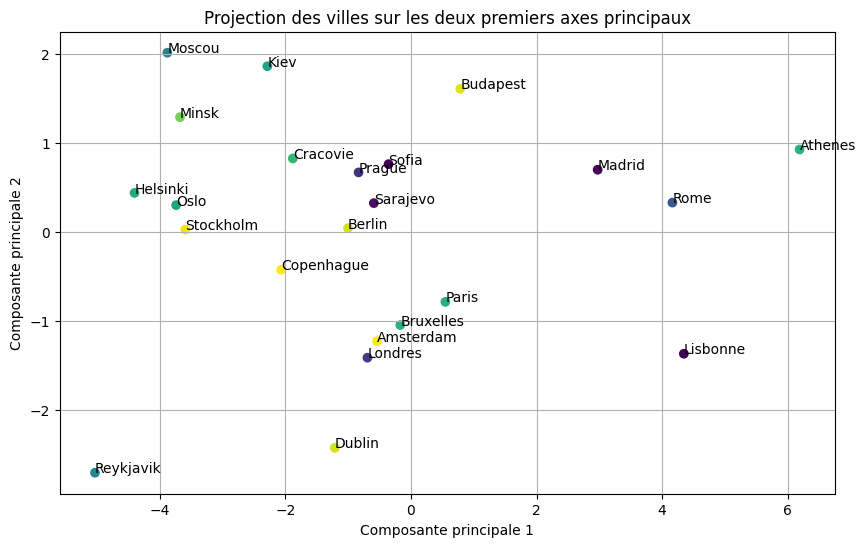

In [51]:
# Affichage des villes
colors = np.random.rand(len(coord_2D))

plt.figure(figsize=(10, 6))
plt.scatter(x_coord, y_coord, c=colors)
for i, ville in enumerate(villes[:23]):
    plt.text(x_coord.iloc[i], y_coord.iloc[i], ville)

plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection des villes sur les deux premiers axes principaux")
plt.grid()
plt.show()

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\text.py:756: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\text.py:757: Com

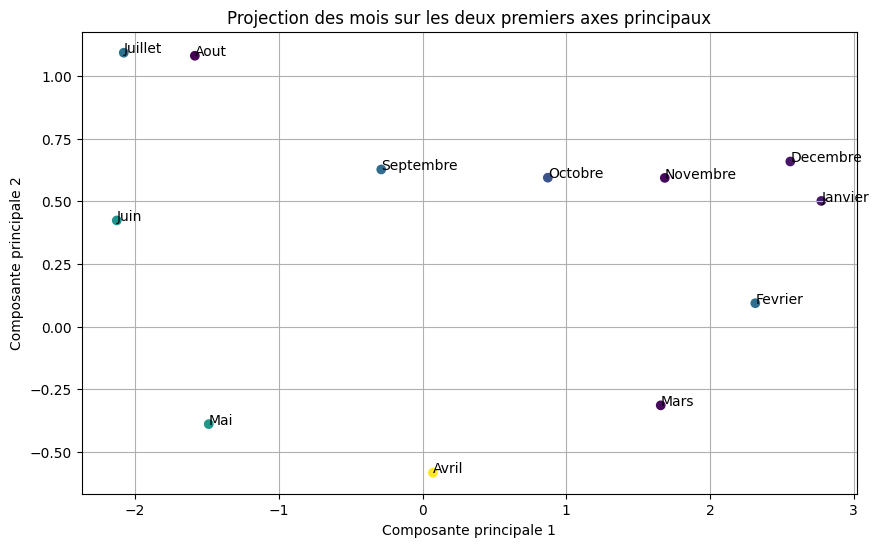

In [52]:
# Calcul de la matrice de corrélation des mois
corr_matrix_months = np.corrcoef(df_temp_standardized)

# Extraction des valeurs propres et vecteurs propres
valeurs_propres_mois, vecteurs_propres_mois = np.linalg.eig(corr_matrix_months)

# Calcul des coordonnées des mois en 2D
coord_2D_mois = df_temp_standardized.T @ vecteurs_propres_mois[:, :2]

x_coord_mois = coord_2D_mois.iloc[:, 0]
y_coord_mois = coord_2D_mois.iloc[:, 1]


# Affichage des mois
colors = np.random.rand(len(coord_2D_mois))
plt.figure(figsize=(10, 6))
plt.scatter(x_coord_mois, y_coord_mois, c=colors)
for i, mois in enumerate(df_temp_standardized.columns):
    plt.text(x_coord_mois.iloc[i], y_coord_mois.iloc[i], mois)

plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection des mois sur les deux premiers axes principaux")
plt.grid()
plt.show()

Les mois d'hiver et d'été sont éloignés ce qui confirme les différences de températures selon la saison.